In [175]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# What does the data look like?
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label :  8


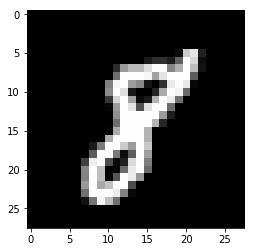

In [176]:
# x_train is 60,000 images, so let's look at one of the images
i = np.where(y_train==8)[0][0]
print("label : ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

In [177]:
# the data should be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000,28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [178]:
print(y_train.shape)
print("label : ", y_train[i, :])

(60000, 10)
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [257]:
# ok now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [258]:
# now we will define the logistic regression classification model.
from keras import models
from keras import layers
from keras import optimizers

model1 = models.Sequential()
model1.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

#compile the model
model1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [259]:
# now fit the model...
eps = 25
history = model1.fit(x_train_part,
                    y_train_part,
                    #batch_size=512,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 3s 65us/step - loss: 7.3417 - acc: 0.5365 - val_loss: 4.9377 - val_acc: 0.6877
Epoch 2/25
48000/48000 [==============================] - 2s 49us/step - loss: 3.8336 - acc: 0.7553 - val_loss: 3.3638 - val_acc: 0.7863
Epoch 3/25
48000/48000 [==============================] - 2s 49us/step - loss: 3.2335 - acc: 0.7941 - val_loss: 3.2025 - val_acc: 0.7953
Epoch 4/25
48000/48000 [==============================] - 2s 49us/step - loss: 3.1110 - acc: 0.8024 - val_loss: 3.1125 - val_acc: 0.8023
Epoch 5/25
48000/48000 [==============================] - 2s 49us/step - loss: 2.9977 - acc: 0.8098 - val_loss: 2.9720 - val_acc: 0.8115
Epoch 6/25
48000/48000 [==============================] - 2s 49us/step - loss: 2.9637 - acc: 0.8120 - val_loss: 2.9000 - val_acc: 0.8175
Epoch 7/25
48000/48000 [==============================] - 2s 50us/step - loss: 2.8974 - acc: 0.8167 - val_loss: 2.8908 - val_acc

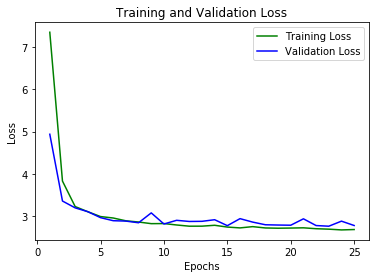

In [260]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

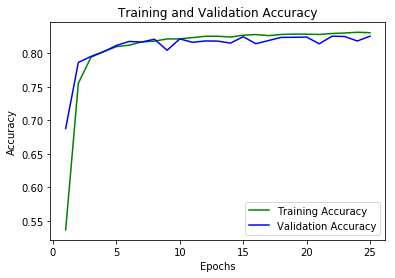

In [261]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [262]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 954,    0,    1,    4,    0,    1,   13,    3,    4,    0],
       [   0, 1091,    7,    6,    0,    3,    4,    2,   22,    0],
       [  11,    0,  939,   17,    0,    1,   15,   15,   28,    6],
       [   3,    0,   25,  919,    0,   14,    2,    9,   32,    6],
       [   1,    4,   14,    1,    0,    0,  119,   54,   83,  706],
       [  10,    1,    8,   45,    0,  731,   17,    9,   66,    5],
       [  13,    3,    5,    1,    0,   11,  917,    3,    4,    1],
       [   2,    8,   24,    5,    0,    0,    0,  963,    9,   17],
       [   3,    3,   12,   18,    0,   13,   12,   10,  897,    6],
       [   9,    3,    3,   11,    0,    8,    1,   43,   20,  911]])

In [263]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       980
          1       0.98      0.96      0.97      1135
          2       0.90      0.91      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.00      0.00      0.00       982
          5       0.93      0.82      0.87       892
          6       0.83      0.96      0.89       958
          7       0.87      0.94      0.90      1028
          8       0.77      0.92      0.84       974
          9       0.55      0.90      0.68      1009

avg / total       0.77      0.83      0.80     10000



/Users/jdumoulin/Envs/python3notebooks/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [232]:
# The linear model confuses certain numbers with others.  
#  It is interesting to examine thos confusions and see 
#  if a person would also make these errors.  
#  Maybe a one-layer MLP will perform better.